In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import Augmentor
import os
import matplotlib.pyplot as plt

2023-12-06 18:39:49.980462: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
print(tf.config.list_physical_devices("GPU"))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


2023-12-06 18:39:54.867120: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-06 18:39:54.976414: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-06 18:39:54.976684: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [4]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4465697568985881402
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 2174156800
locality {
  bus_id: 1
  links {
  }
}
incarnation: 1372674951307761079
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6"
xla_global_id: 416903419
]


2023-12-06 18:39:56.775221: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-06 18:39:56.775915: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-06 18:39:56.776396: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [5]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  try:
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:

    print(e)

1 Physical GPUs, 1 Logical GPUs


2023-12-06 18:39:59.041785: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-06 18:39:59.042267: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-06 18:39:59.042564: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [7]:
test_fake="/home/lagrangian/DEEP/FAKE NOTE DETECTION/FakeCurrencyDetectionSystem-master/Dataset/Testing/Fake"
test_real="/home/lagrangian/DEEP/FAKE NOTE DETECTION/FakeCurrencyDetectionSystem-master/Dataset/Testing/Real"

train_fake="/home/lagrangian/DEEP/FAKE NOTE DETECTION/FakeCurrencyDetectionSystem-master/Dataset/Training/Fake"
train_real="/home/lagrangian/DEEP/FAKE NOTE DETECTION/FakeCurrencyDetectionSystem-master/Dataset/Training/Real"

### data Augmentation..

In [ ]:


def AUG(path):
    path_to_images =path
    p = Augmentor.Pipeline(path_to_images)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.flip_left_right(probability=0.5)
    p.zoom_random(probability=0.5, percentage_area=0.8)
    num_of_augmented_images = 100
    p.sample(num_of_augmented_images, multi_threaded=True)

### Another dataaugmentation methods....

In [ ]:
def _ImageAugmentation(_path):
    import os
    import cv2

    for img_name in os.listdir(_path):
        image_path = os.path.join(_path, img_name)
        image_file = cv2.imread(image_path)
        image_file = cv2.resize(image_file, (512, 512))

        # Rotation operation
        height, width = image_file.shape[:2]
        angle = 179
        rotation_matrix = cv2.getRotationMatrix2D((width // 2, height // 2), angle, 1)
        rotated_image = cv2.warpAffine(image_file, rotation_matrix, (width, height))

        # # Grayscale conversion
        # gray_image = cv2.cvtColor(image_file, cv2.COLOR_BGR2GRAY)


        # salt and paper

        prob = 0.05  # Probability of noise (adjust as needed)
        noise = np.random.rand(image_file.shape[0], image_file.shape[1])
        image_file[noise < prob/2] = 0  # Pepper noise
        image_file[noise > 1 - prob/2] = 255

        # Histogram Equalization
        gray_img = cv2.cvtColor(image_file, cv2.COLOR_BGR2GRAY)
        equalized_image = cv2.equalizeHist(gray_img)

        # contrust image
        const_img=cv2.cvtColor(image_file,cv2.COLOR_BGR2RGB)
        adjusted_image = cv2.convertScaleAbs(const_img, alpha=1.5, beta=0)

        # Saving the augmented images
        cv2.imwrite(os.path.join(_path, f"rotated_{img_name}"), rotated_image)
        # cv2.imwrite(os.path.join(_path, f"grayscale_{img_name}"), gray_image)
        cv2.imwrite(os.path.join(_path, f"equalized_{img_name}"), equalized_image)
        cv2.imwrite(os.path.join(_path, f"noise_salt_{img_name}"), image_file)
        cv2.imwrite(os.path.join(_path, f"const_img_{img_name}"), adjusted_image)

In [ ]:
_ImageAugmentation(test_fake)
_ImageAugmentation(test_real)
_ImageAugmentation(train_fake)
_ImageAugmentation(train_real)

In [ ]:
AUG(test_fake)
AUG(test_real)
AUG(train_fake)
AUG(train_real)


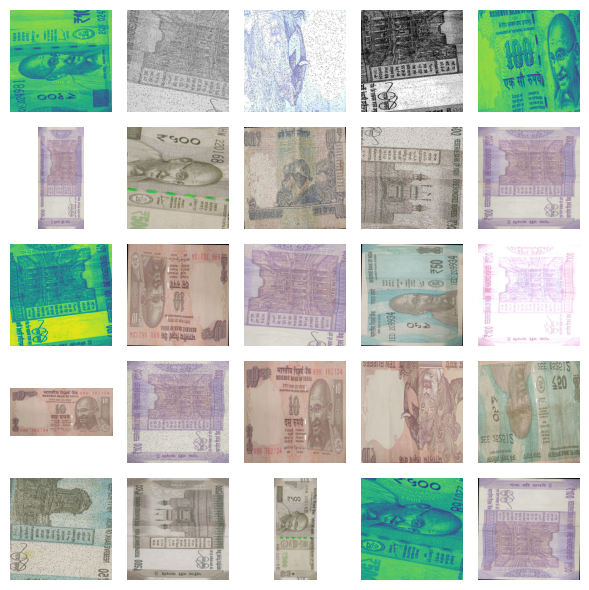

In [8]:

image_files = [os.path.join(train_real, file) for file in os.listdir(train_real) if file.endswith(('png', 'jpg', 'jpeg'))]
grid_size = 5
fig, axs = plt.subplots(grid_size, grid_size, figsize=(6, 6))
for i in range(grid_size):
    for j in range(grid_size):
        if i * grid_size + j < len(image_files):
            img = plt.imread(image_files[i * grid_size + j])
            axs[i, j].imshow(img)
            axs[i, j].axis('off') 
        else:
            axs[i, j].axis('off')
plt.tight_layout()
plt.show()

### create labeling data using image data generator

In [9]:
TRAIN_PATH='/home/lagrangian/DEEP/FAKE NOTE DETECTION/FakeCurrencyDetectionSystem-master/Dataset/Training'
TEST_PATH='/home/lagrangian/DEEP/FAKE NOTE DETECTION/FakeCurrencyDetectionSystem-master/Dataset/Testing'

In [10]:
train_datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.3,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
train_gen=train_datagen.flow_from_directory(
    TRAIN_PATH,
    target_size=(128,128),
    batch_size=8,
    class_mode='binary'
)

Found 192 images belonging to 2 classes.


In [11]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    TEST_PATH,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

Found 79 images belonging to 2 classes.


### CNN model...

In [12]:
def CNNmodel():
    model=Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(32, (2,2), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (2,2), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, (2,2), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(units=256, activation='relu'))
    model.add(Dense(units=1, activation='sigmoid'))
    model.summary()
    return model

In [ ]:
# def CNNmodel():
#     model = Sequential()
#     model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(64,64,3)))
#     model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Dropout(0.25))
#     model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Dropout(0.25))
#     model.add(Flatten())
#     model.add(Dense(1024, activation='relu'))
#     model.add(Dropout(0.5))
#     model.add(Dense(1, activation='sigmoid'))
#     return model

In [13]:
model=CNNmodel()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        8256      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 64)         0

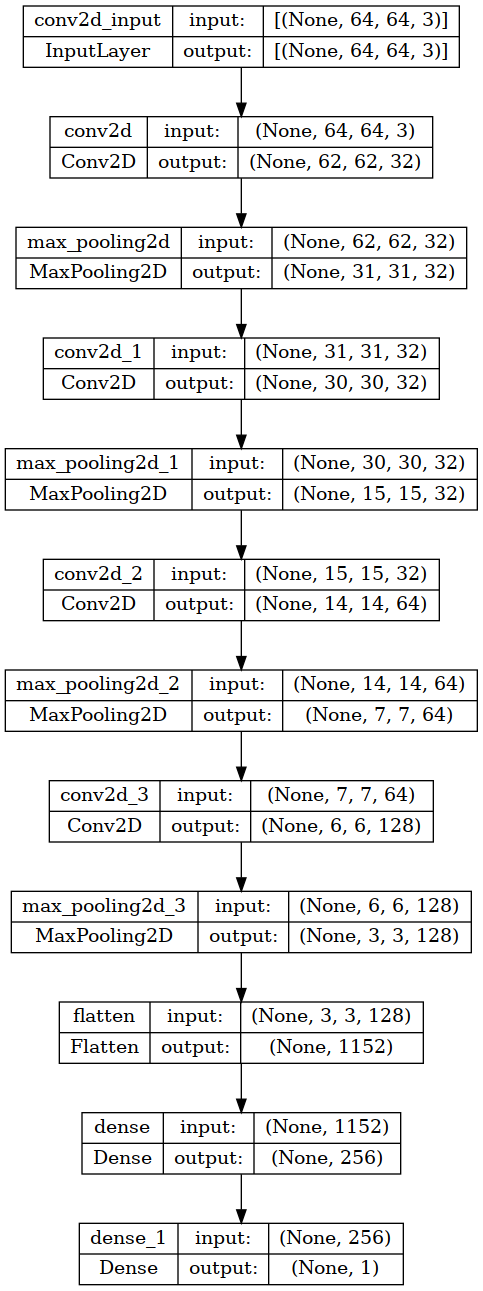

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(
    model,
    to_file="model.png",
    show_shapes=True)

In [14]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history=model.fit(train_gen,
                         steps_per_epoch=3,
                         epochs=20,
                         validation_data=test_generator,
                         validation_steps=8)

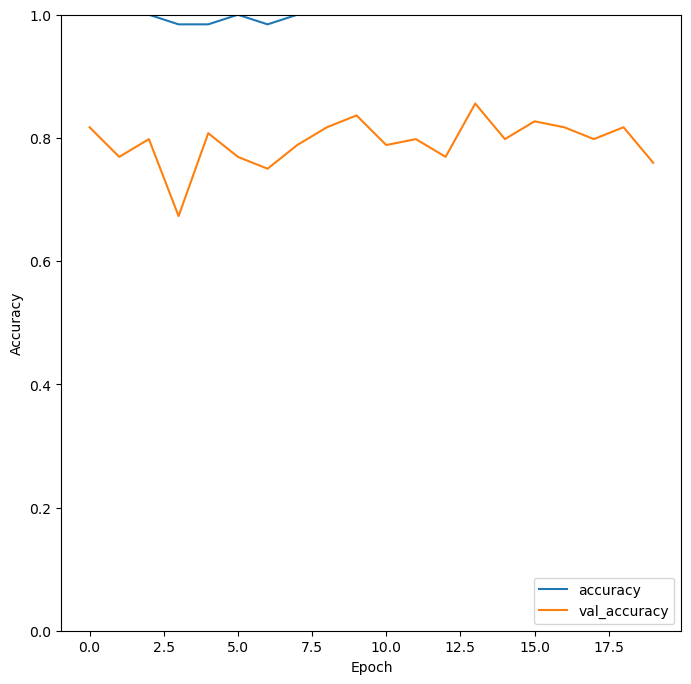

In [ ]:
from matplotlib import pyplot as plt


plt.figure(figsize=(8, 8))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0,1])
plt.legend(loc='lower right')

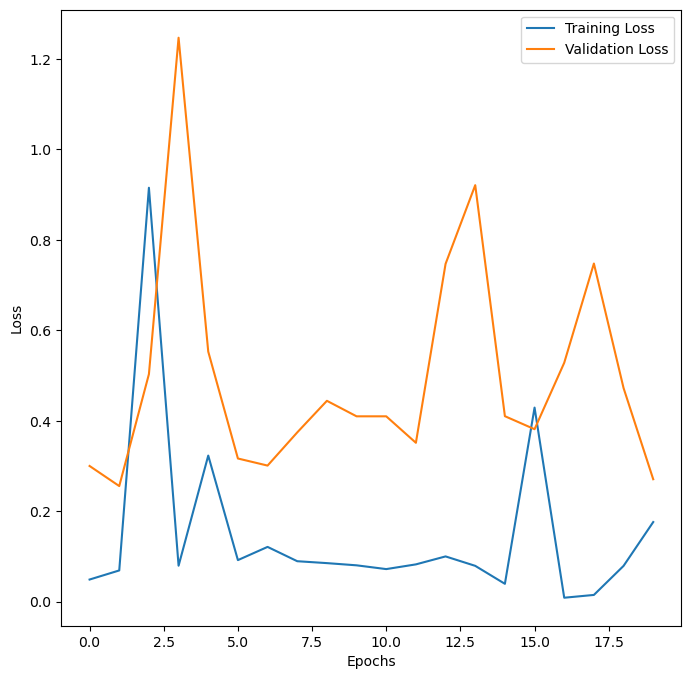

In [ ]:
plt.figure(figsize=(8, 8))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
test_image = image.load_img('/home/lagrangian/DEEP/FAKE NOTE DETECTION/FakeCurrencyDetectionSystem-master/Dataset/Testing/Fake/Screenshot from 2023-11-26 04-56-14.png', target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = model.predict(test_image)
print(result)

1/1 [==============================] - 0s 210ms/step
[[0.]]


In [ ]:
print(result)

[[0.]]
